# Probar clasificadores y crear submission

Fichero definitivo para probar diferentes clasificadores y crear una submission. Todas las funciones definidas por nosotros se guardan en el fichero sentimentAnalysis.py. Lo primero que hay que hacer es llamar a este paquete de funciones como si se tratase de cualquier otro paquete.

In [8]:
# Importamos ficheros necesarios para el script
# (lo que se ejecuta dentro de una funcion se llama desde el sentiment analysis)
import pandas as pd
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC 
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
# Importamos el fichero sentiment analysis. 
import sentimentAnalysis as sa

## Scrapping: Crear csv 
**nota**: No ejecutar este apartado a no ser que se quiera volver a crear el fichero de preprocesado. Este apartado es para hacer scrapping en la web de twitter

In [ ]:
# Preprocesado de datos 
df=pd.read_csv('tweets_public.csv',index_col='tweet_id')
df_preprocesado=sa.scrap_data_and_preprocess(df)
df_preprocesado.to_csv('tweets_processed.csv')

# Preprocesado de datos para submission
df_sub = pd.read_csv('tweets_submission.csv', index_col='tweet_id')
df_sub_proc=sa.scrap_data_and_preprocess(df_sub)
df_sub_proc.to_csv('tweets_submission_processed.csv')

## Preprocesado

In [10]:
df_raw=pd.read_csv('tweets_public.csv',index_col='tweet_id')
df = pd.read_csv('tweets_processed.csv', index_col='tweet_id')

binary=False;
extra_features=True;
max_df=0.4;
max_features=3000;
ngram_range=3;
norm=1;
add_stemmer=True;
add_stopwords=True;
is_submission=False;
# Si se quieren añadir más cosas al preprocesado, se haría en esta función
data = sa.preprocess_data(df,df_raw,extra_features,add_stemmer,is_submission)

## Creación de la matriz de datos

In [11]:
# Aqui se crea la bag of words y se añaden las features extra
dataset = sa.obtain_data_representation(data,
                                        None,
                                        max_df,
                                        binary,
                                        max_features,
                                        ngram_range,
                                        norm,
                                        extra_features,
                                        add_stemmer,
                                        add_stopwords)

## Entrenar modelo y observar resultado

In [12]:
# Entrenamos el modelo: Los modelos con mejores resultados fueron "SVC y LogisticRegression"
model , _ ,conf, gcb,bag = sa.train_model(dataset, SVC, kernel='linear')
#model , _ ,conf, gcb,bag = sa.train_model(dataset, LogisticRegression, penalty='l2',solver='newton-cg',multi_class='multinomial')


Model score is: 0.6273512963904423


Normalized confusion matrix
[[0.4122807  0.33040936 0.25730994]
 [0.12907801 0.53333333 0.33758865]
 [0.04891304 0.17173913 0.77934783]]


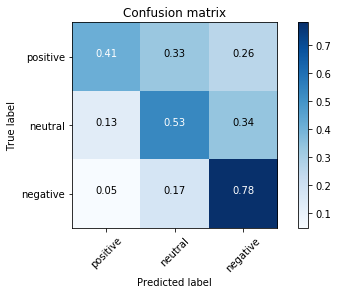

In [13]:
# Plot confusion matrix
plt.figure()
sa.plot_confusion_matrix(conf, ['positive', 'neutral', 'negative'],True)

## Crear submission

Una vez tenemos el clasificador que nos convence, hacemos lo mismo con el de submission

In [ ]:
df_submission = pd.read_csv('tweets_submission_processed.csv', index_col='tweet_id')
df_submission_raw = pd.read_csv('tweets_submission.csv', index_col='tweet_id')

# We use df_submision as test, otherwise it would split df in train/test
# Se usan las mismas características que antes
is_submission=True

data_submission = sa.preprocess_data(df_submission,df_submission_raw,extra_features,add_stemmer,is_submission)


submission_dataset =sa.obtain_data_representation(data,
                                               data_submission,
                                               max_df,
                                               binary,
                                               max_features,
                                               ngram_range,
                                               norm,
                                               extra_features,
                                               add_stemmer,
                                               add_stopwords)

# Predict for df_submission
#_, y_pred = train_model(submission_dataset, BernoulliNB)
_, y_pred,_,_,_ = sa.train_model(submission_dataset, LogisticRegression, penalty='l2',solver='newton-cg',multi_class='multinomial')

# Create submission file with obtained y_pred
sa.create_submit_file(df_submission, y_pred)
